# VARIANCE

**Authors:**  
- Nava del Río José Antonio  
- Ojeda Contreras Braulio Melquisedec   
- Suárez Pérez Juan Pablo  
- Vázquez Portuguez José Antonio  

**Date:** 07/10/2023

## Instructions
In order to explore the operation of the T-test, perform the following tasks:
1. Download a multi-feature tabular dataset for regression.
2. Fit a linear model of various characteristics.
3. For each parameter I calculated the standard error.
4. Plot the probability density function of each parameter on a single graph (with a different color for each) under the assumption that it is normally distributed. Check the size of each PDF (jth value) parameter.

### About Dataset
**Description:**  

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.  

**Variables:**
- Hours Studied: The total number of hours spent studying by each student.  
- Previous Scores: The scores obtained by students in previous tests.  
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).  
- Sleep Hours: The average number of hours of sleep the student had per day.  
- Sample Question Papers Practiced: The number of sample question papers the student practiced.  

**Target Variable:**  
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.  

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

### Env

In [1]:
# Libraries needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t

In [2]:
# Dataset.
path = "./datasets/students_performance.csv"
# Getting data.
df = pd.read_csv(path)

### Viewing Data

In [3]:
# Info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
# Visualization of data.
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
# Data resume. 
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Data transformation

In [6]:
# Using one hot encoding for 'Extracurricular Activities'.
df_encoded = pd.get_dummies(df, columns=['Extracurricular Activities'])
df_encoded['Extracurricular Activities_Yes'] = df_encoded['Extracurricular Activities_Yes'].replace({True: 1, False: 0})
df_encoded['Extracurricular Activities_No'] = df_encoded['Extracurricular Activities_No'].replace({True: 1, False: 0})
df_encoded.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [7]:
# Getting Features and labels.
X = df_encoded[["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Extracurricular Activities_No", "Extracurricular Activities_Yes"]]
y = df_encoded['Performance Index']

In [8]:
# Getting train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Applying standard scaling.
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)

### Linear model

In [10]:
# Function to get estimators.
def fit_linear_model(X, y):
    """
        Fitting the estimators of linear model.
        Arguments:
            X: a list of values.
            y: a list of values.
        Return:
            estimators: a list with b_1_est and b_0_est.
    """
    # Creation of ones array.
    ones_array = np.ones(X.shape[1])
    # Concatenation of arrays.
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    # Fitting estimators.
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators

In [11]:
# Function to implement a linear model.
def linear_model(X, estimators):
    """
        Implementation of linear model.
        Arguments:
            X: a list of values.
            estimators: a list of b.
        Returns:
            y: a list of values.
    """
    # Creation of ones array.
    ones_array = np.ones((len(X), 1))
    # Concatenation of arrays.
    X = np.hstack((X, ones_array))
    # Generation of y.
    y = np.dot(X, estimators)
    
    return y

In [12]:
# Function to get some model metrics.
def model_metrics(X, y):
    """
    Getting some metrics from any model.
        Arguments:
            X: a list of features.
            y: a list of labels.
        Return:
            metrics: a list with the next metrics (estimators, SST, SSE, SSR, R^2, variance)
    """
    # Fit model.
    estimators = fit_linear_model(X, y)
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting y_mean
    y_mean = np.array(y).mean()
    # Getting SST.
    sst = np.array([(y_i - y_mean) ** 2 for y_i in y]).sum()
    # Getting SSE.
    sse = np.array([(y_i_est - y_mean) ** 2 for y_i_est in y_ests]).sum()
    # Getting SSR.
    ssr = np.array([(y[i] - y_ests[i]) ** 2 for i in range(len(y))]).sum()
    # Getting R^2
    r_2 = ssr / sst
    # Getting variance
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    # Save metrics. 
    metrics = [estimators, sst, sse, ssr, r_2, variance]
    
    return metrics

In [13]:
# Function to get the variance of every estimator.
def get_variance(X, y):
    """
    Getting variance of each estimator.
        Arguments:
            X: a list of features.
            y: a list of labels.
            estimators: any regression model.
        Return:
            vars_j: a list with var_j of each feature.
    """
    # Vars_j inicialization.
    vars_j = list()
    for j in range(X.shape[1]):
        # Getting features.
        X_out_j = np.delete(X, j, axis = 1)
        X_j = X[:, j]
        # Getting metrics.
        _, sst, sse, ssr, r_2, variance = model_metrics(X_out_j, X_j)
        # Getting var for each feature.
        var_j = variance / (sst * (1 - r_2))
        vars_j.append(abs(var_j))
        
    return vars_j

In [14]:
# Getting the fitting model.
estimators = fit_linear_model(X_train_scaled, y_train)

In [15]:
# Gettin vars of each estimator.
vars_j = get_variance(X_train_scaled, y_train)

In [16]:
count = 0
for var_j, estimator in zip(vars_j, estimators):
    print(f'For feature {count}: b_{count} = {estimator:5.2f}, var = {var_j:5.2f}')
    count += 1

For feature 0: b_0 =  7.40, var =  0.32
For feature 1: b_1 = 17.64, var =  0.51
For feature 2: b_2 =  0.81, var =  0.27
For feature 3: b_3 =  0.55, var =  0.39
For feature 4: b_4 = -0.15, var =  0.00
For feature 5: b_5 =  0.15, var =  0.00


### Graph

In [17]:
# Getting Normal Distribution with b_j and vars_j
N = 100000
# Initializing values.
distributions = list()
# Getting standard deviation.
desv = np.array([np.sqrt(vars_j[i]) for i in range(len(vars_j))])

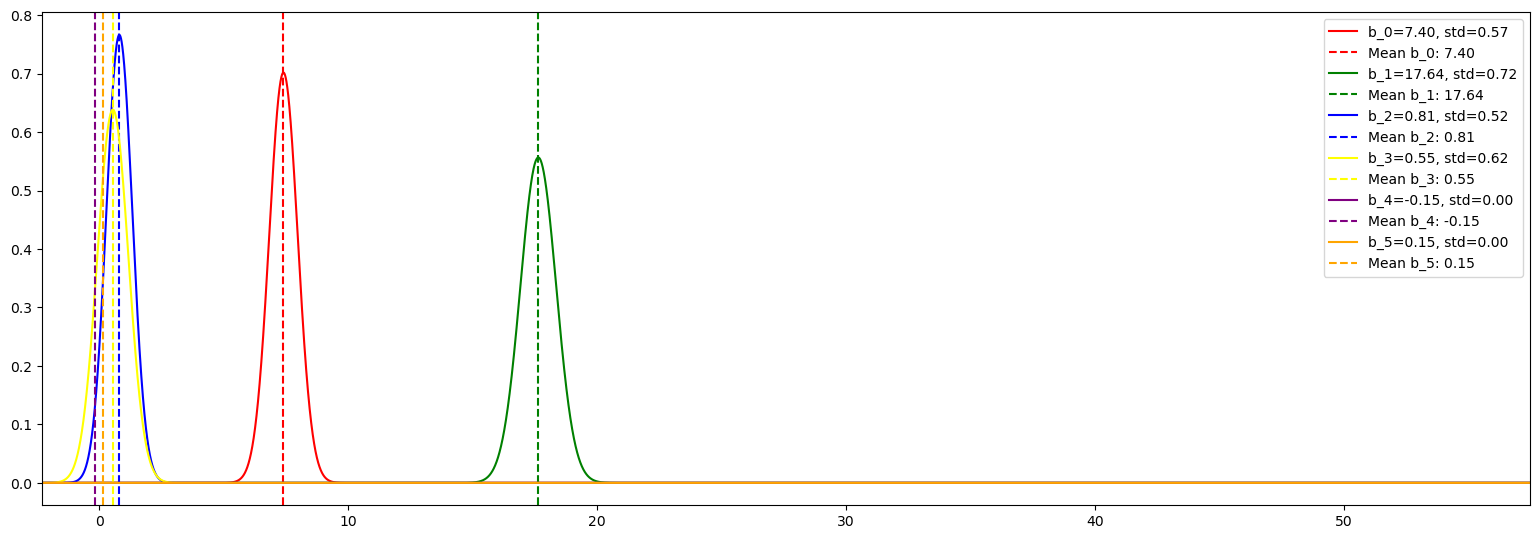

In [18]:
# Initializing values.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink']
cont = 0
# Getting the width of the current cell (in inches).
width_cell = plt.rcParams['figure.figsize'][0]
# X data
x = np.linspace(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv), N)
for estimator, dev in zip(estimators, desv):
    y = norm.pdf(x, estimator, dev)
    # Probability density function.
    plt.plot(x, y, color=colors[cont], label=f'b_{cont}={estimator:.2f}, std={dev:.2f}')
    plt.axvline(x=estimator, color=colors[cont], linestyle='--', label=f'Mean b_{cont}: {estimator:.2f}')
    plt.gcf().set_size_inches(width_cell * 3, width_cell)
    cont += 1
# Show plot.
plt.xlim(min(estimators) - 3 * max(desv), max(estimators) + 3 * max(desv))
plt.legend()
plt.show()